In [ ]:
# Imports
from scipy.spatial import distance
import statistics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
#  carregando as bases
vendas_caminho = '/content/drive/MyDrive/Bix_projeto_dados/vendas.csv'
consumidores_caminho = '/content/drive/MyDrive/Bix_projeto_dados/consumidores.csv'
lojas_caminho = '/content/drive/MyDrive/Bix_projeto_dados/lojas.csv'
produto_caminho = '/content/drive/MyDrive/Bix_projeto_dados/produtos.csv'

vendas = pd.read_csv(vendas_caminho,sep = ',',header = 4)
consumidores = pd.read_csv(consumidores_caminho,sep = ',', header = 0)
lojas = pd.read_csv(lojas_caminho,sep = ',', header = 0)
produto = pd.read_csv(produto_caminho,sep = ',', header = 0)

In [ ]:
print(vendas.columns)
print(lojas.columns)
print(consumidores.columns)
print(produto.columns)

Index(['Unnamed: 0', 'Unnamed: 1', 'ID', 'ProductID', 'ClientID', 'Discount',
       'UnitPrice', 'Quantity', 'StoreID', 'Date'],
      dtype='object')
Index(['ID', 'Name', 'State'], dtype='object')
Index(['ID', 'City', 'State', 'DateOfBirth', 'Sex'], dtype='object')
Index(['ID', 'Name', 'Size'], dtype='object')


In [ ]:
vendas = vendas.drop(['Unnamed: 0','Unnamed: 1'] ,axis = 1, inplace = False) #dropando colunas vazias


In [ ]:
produto.shape

(73, 3)

In [ ]:
# verificando valores faltantes
print(f'vendas:\n{vendas.isna().sum()}')
print(f'lojas\n{lojas.isna().sum()}')
print(f'consumidores:\n{consumidores.isna().sum()}')
print(f'produtos:\n{produto.isna().sum()}')

vendas:
ID           0
ProductID    0
ClientID     0
Discount     0
UnitPrice    0
Quantity     0
StoreID      0
Date         0
dtype: int64
lojas
ID       0
Name     0
State    0
dtype: int64
consumidores:
ID             0
City           0
State          0
DateOfBirth    0
Sex            0
dtype: int64
produtos:
ID      0
Name    0
Size    0
dtype: int64


In [ ]:
# rename keys columns
consumidores = consumidores.rename(columns={"ID": "ClientID",'State':'destiny_state','City':'destiny_city'})
lojas = lojas.rename(columns={'ID':'StoreID','State':'origin_state','Name':'origin_city'})
produto = produto.rename(columns={'ID':'ProductID','Name':'product_name'})

In [ ]:
# fazendo um depara entre as tabelas
# partindo da ideia de que a tabela vendas é a tabela fato faço merge com as tabelas de dimensão
data = pd.merge(vendas, consumidores, on = 'ClientID', how = 'left')
data = pd.merge(data, produto, on = 'ProductID',how='left')
data = pd.merge(data, lojas, on = 'StoreID', how = 'left')

In [ ]:
data.head()

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,destiny_city,destiny_state,DateOfBirth,Sex,product_name,Size,origin_city,origin_state
0,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001,"0,08","249,2",1,4,12/10/2018,Curitiba,PR,6/28/1985,Homem,Tempestade,G,Curitiba,PR
1,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,"0,1","162,4",1,4,4/25/2019,Curitiba,PR,6/28/1985,Homem,Thanos,G,Curitiba,PR
2,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,"0,1","194,6",1,4,7/17/2019,Curitiba,PR,6/28/1985,Homem,Capitão América,P,Curitiba,PR
3,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,14002,"0,1","201,6",2,1,4/10/2018,Florianópolis,SC,1/10/1987,Homem,Wolverine,G,Florianópolis,SC
4,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002,"0,1",406,1,1,1/21/2019,Florianópolis,SC,1/10/1987,Homem,Naruto,G,Florianópolis,SC


In [ ]:
data.ProductID.count()

32753

In [ ]:
data.groupby(['product_name','Size']).sum('Quantity').sort_values(['Quantity']).tail()

,,ClientID,Quantity,StoreID
product_name,Size,,,
Flash,G,19919913,996,3582
Capitã Marvel,G,20025234,996,3710
Deadpool,G,19679425,998,3350
Iron Man,G,20604042,1018,3438
Bazinga,G,20371449,1020,3462


In [ ]:
# concatenating the columns
data['prod_tam'] = data['product_name'].map(str) + '_' + data['Size'].map(str)

In [ ]:
data['prod_tam'].unique

<bound method Series.unique of 0              Tempestade_G
1                  Thanos_G
2         Capitão América_P
3               Wolverine_G
4                  Naruto_G
                ...        
32748             Bazinga_M
32749            Iron Man_G
32750    Mulher-Maravilha_G
32751             Bazinga_G
32752            Deadpool_M
Name: prod_tam, Length: 32753, dtype: object>

In [ ]:
import datetime
data['Date']= pd.to_datetime(data['Date'])

data['Year'] = data['Date'].dt.strftime('%Y')
data['Month'] = data['Date'].dt.strftime('%m')


## questao 8

In [ ]:
data.head()

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,destiny_city,destiny_state,DateOfBirth,Sex,product_name,Size,origin_city,origin_state,prod_tam,Year,Month
0,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001,"0,08","249,2",1,4,2018-12-10,Curitiba,PR,6/28/1985,Homem,Tempestade,G,Curitiba,PR,Tempestade_G,2018,12
1,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,"0,1","162,4",1,4,2019-04-25,Curitiba,PR,6/28/1985,Homem,Thanos,G,Curitiba,PR,Thanos_G,2019,04
2,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,"0,1","194,6",1,4,2019-07-17,Curitiba,PR,6/28/1985,Homem,Capitão América,P,Curitiba,PR,Capitão América_P,2019,07
3,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,14002,"0,1","201,6",2,1,2018-04-10,Florianópolis,SC,1/10/1987,Homem,Wolverine,G,Florianópolis,SC,Wolverine_G,2018,04
4,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002,"0,1",406,1,1,2019-01-21,Florianópolis,SC,1/10/1987,Homem,Naruto,G,Florianópolis,SC,Naruto_G,2019,01


In [ ]:
receita_2019 = data[data['Year']=="2019"]
receita_2019.dtypes

ID                       object
ProductID                object
ClientID                  int64
Discount                 object
UnitPrice                object
Quantity                  int64
StoreID                   int64
Date             datetime64[ns]
destiny_city             object
destiny_state            object
DateOfBirth              object
Sex                      object
product_name             object
Size                     object
origin_city              object
origin_state             object
prod_tam                 object
Year                     object
Month                    object
dtype: object

In [ ]:
receita_2019['UnitPrice'] =receita_2019['UnitPrice'].replace(',', '.',regex=True)
receita_2019['Discount'] =receita_2019['Discount'].replace(',', '.',regex=True)

receita_2019['UnitPrice']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1        162.4
2        194.6
4          406
5        249.2
6        261.8
         ...  
32733      210
32739    204.4
32740    249.2
32750    148.4
32751    218.4
Name: UnitPrice, Length: 14768, dtype: object

In [ ]:
receita_2019['UnitPrice'] = receita_2019['UnitPrice'].astype(float)
receita_2019['Discount'] = receita_2019['Discount'].astype(float)

receita_2019['gmv_mes'] = ((receita_2019['Quantity'] * receita_2019['UnitPrice']) - receita_2019['Discount'])/12
receita_2019.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,destiny_city,destiny_state,DateOfBirth,Sex,product_name,Size,origin_city,origin_state,prod_tam,Year,Month,gmv_mes
1,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,0.10,162.4,1,4,2019-04-25,Curitiba,PR,6/28/1985,Homem,Thanos,G,Curitiba,PR,Thanos_G,2019,04,13.525000
2,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,0.10,194.6,1,4,2019-07-17,Curitiba,PR,6/28/1985,Homem,Capitão América,P,Curitiba,PR,Capitão América_P,2019,07,16.208333
4,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002,0.10,406.0,1,1,2019-01-21,Florianópolis,SC,1/10/1987,Homem,Naruto,G,Florianópolis,SC,Naruto_G,2019,01,33.825000
5,7ab64f42a8f9ab290e920eed320d7e60,002552c0663708129c0019cc97552d7d3,14002,0.10,249.2,1,1,2019-03-28,Florianópolis,SC,1/10/1987,Homem,Tempestade,G,Florianópolis,SC,Tempestade_G,2019,03,20.758333
6,b35a771164a9defa3b4767f1b66918b1,002959d7a0b0990fe2d69988affcbc803,14002,0.08,261.8,1,1,2019-08-14,Florianópolis,SC,1/10/1987,Homem,Ciclope,G,Florianópolis,SC,Ciclope_G,2019,08,21.810000


In [ ]:
receita_liquida = receita_2019.groupby(['origin_city'])["gmv_mes"].sum().sort_values()

In [ ]:
receita_liquida

origin_city
Online             9367.285000
Belo Horizonte    17666.791667
São Paulo         35285.455000
Curitiba          51448.308333
Porto Alegre      61320.780000
Rio de Janeiro    66395.965000
Florianópolis     82642.726667
Name: gmv_mes, dtype: float64

## questao 7

In [ ]:

ironman_G = data[data["prod_tam"] == "Iron Man_G"]
ironman_G = ironman_G[ironman_G["Year"] == "2019"]
ironman_G

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,destiny_city,destiny_state,DateOfBirth,Sex,product_name,Size,origin_city,origin_state,prod_tam,Year,Month
203,a97c9b194a026ac3e75726c485f6e8ea,002d4ea7c04739c130bb74d7e7cd16943,14074,"0,08",210,1,2,2019-06-28,Rio de Janeiro,RJ,8/15/1973,Mulher,Iron Man,G,Rio de Janeiro,RJ,Iron Man_G,2019,06
221,ea110ced6459b4dc6c73e0b2367077e9,002d4ea7c04739c130bb74d7e7cd16943,14080,"0,1",210,1,1,2019-09-03,Florianópolis,SC,11/25/1990,Homem,Iron Man,G,Florianópolis,SC,Iron Man_G,2019,09
238,89fb8b371b28dcc037a9c1f798eacc81,002d4ea7c04739c130bb74d7e7cd16943,14088,"0,1",210,1,1,2019-05-06,Florianópolis,SC,9/18/1987,Homem,Iron Man,G,Florianópolis,SC,Iron Man_G,2019,05
323,51efa345a1180ca3879442a31b0a265a,002d4ea7c04739c130bb74d7e7cd16943,14127,"0,1",210,1,22,2019-09-04,Belo Horizonte,BH,9/3/1969,Homem,Iron Man,G,Online,na,Iron Man_G,2019,09
487,f89525a2a79be7efb2afb5844cf2652d,002d4ea7c04739c130bb74d7e7cd16943,14197,"0,1",210,1,1,2019-10-26,Florianópolis,SC,11/16/1954,Homem,Iron Man,G,Florianópolis,SC,Iron Man_G,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32491,46f0668d5961419489c708d57e9e99bb,002d4ea7c04739c130bb74d7e7cd16943,28581,"0,1",210,1,4,2019-03-06,Curitiba,PR,6/3/1987,Homem,Iron Man,G,Curitiba,PR,Iron Man_G,2019,03
32599,e9a673444938dfb3ee73bc31383f2921,002d4ea7c04739c130bb74d7e7cd16943,28627,"0,1",210,1,1,2019-11-04,Florianópolis,SC,4/16/1973,Homem,Iron Man,G,Florianópolis,SC,Iron Man_G,2019,11
32626,ffdb12bf66b3d0145d09d962745a05f6,002d4ea7c04739c130bb74d7e7cd16943,28641,"0,08",210,1,4,2019-08-07,Curitiba,PR,12/27/1979,Homem,Iron Man,G,Curitiba,PR,Iron Man_G,2019,08
32680,53802dd14f00658bd63315e41be39610,002d4ea7c04739c130bb74d7e7cd16943,28664,"0,1",210,1,3,2019-03-23,Porto Alegre,RS,4/22/1984,Homem,Iron Man,G,Porto Alegre,RS,Iron Man_G,2019,03


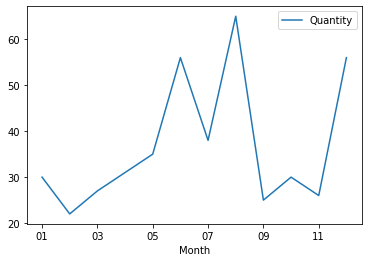

In [ ]:
# plotar gráfico de consumo de eletricidade
plot = ironman_G.filter(items=['Quantity','Month'])
plot = plot.groupby('Month').sum('Quantity')
plot.plot()